<a href="https://colab.research.google.com/github/kauarodriguessss/TechnionChallenge/blob/main/EDA_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kauarodriguesss","key":"f7f952f006787c4a3ad167975112babf"}'}

In [2]:
import os

# Create the ~/.kaggle folder if it doesn't exist
!mkdir -p ~/.kaggle

# Move kaggle.json to the correct folder
!mv kaggle.json ~/.kaggle/

# Ensure the file has the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

# Check if the file was moved correctly
!ls ~/.kaggle


kaggle.json


In [3]:
# Download the Kaggle dataset (replace with the correct name)
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors


In [4]:
import zipfile
import os

# Correct name of the ZIP file (matches the name listed in !ls)
zip_file = "brain-mri-images-for-brain-tumor-detection.zip"

# Create folder to extract the dataset
extract_folder = "/content/dataset"
os.makedirs(extract_folder, exist_ok=True)

# Extract the files
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # ✅ Correct indentation here!

print(f"Files extracted to: {extract_folder}")

# List the extracted files
print("Extracted files:", os.listdir(extract_folder))


Files extracted to: /content/dataset
Extracted files: ['no', 'brain_tumor_dataset', 'yes']


📌 1. Counting how many images there are in each class.

In [5]:
import os

def count_images(dataset_path):
    "Count the number of images in each class folder."
    classes = ["yes", "no"]  # "yes" = tumor, "no" = no tumor

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        num_images = len(os.listdir(class_path))
        print(f"Class '{class_name}': {num_images} images")

# Example usage
dataset_path = "/content/dataset/brain_tumor_dataset"
count_images(dataset_path)


Class 'yes': 155 images
Class 'no': 98 images


📌 2. Viewing some random images.

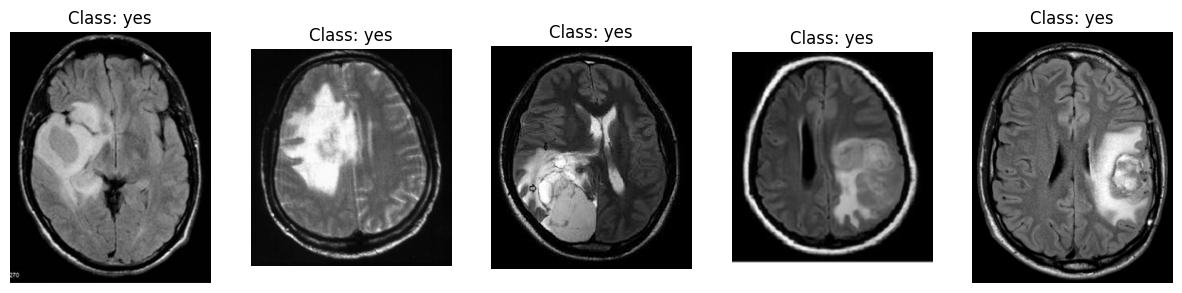

In [6]:
import matplotlib.pyplot as plt
import cv2
import random
import os

def view_random_images(dataset_path, class_name="yes", num_images=5):
    "Display random images from a selected class."
    class_path = os.path.join(dataset_path, class_name)
    images = random.sample(os.listdir(class_path), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Class: {class_name}")
        axes[i].axis("off")

    plt.show()

# Example usage
dataset_path = "/content/dataset/brain_tumor_dataset"
view_random_images(dataset_path, class_name="yes")


📌 3. Checking image sizes

In [7]:
import os
import cv2

def check_image_sizes(dataset_path, class_name="yes"):
    "Check the dimensions of images in a given class."
    class_path = os.path.join(dataset_path, class_name)
    image_sizes = []

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])

    unique_sizes = set(image_sizes)
    print(f"Unique image sizes in class '{class_name}': {unique_sizes}")

# Example usage
dataset_path = "/content/dataset/brain_tumor_dataset"
check_image_sizes(dataset_path, class_name="yes")
check_image_sizes(dataset_path, class_name="no")


Unique image sizes in class 'yes': {(303, 223), (295, 283), (993, 825), (555, 526), (310, 246), (309, 232), (223, 226), (300, 263), (938, 864), (355, 272), (323, 276), (359, 297), (348, 287), (354, 303), (355, 311), (446, 450), (291, 253), (520, 433), (355, 320), (277, 272), (247, 204), (347, 300), (210, 200), (256, 197), (620, 620), (308, 244), (246, 205), (300, 240), (251, 201), (260, 194), (500, 377), (298, 260), (237, 213), (249, 178), (879, 766), (586, 467), (340, 314), (324, 272), (283, 231), (1427, 1275), (279, 258), (256, 256), (380, 310), (355, 290), (336, 264), (338, 283), (360, 313), (337, 293), (352, 281), (1024, 1024), (380, 294), (219, 230), (929, 634), (225, 225), (318, 273), (212, 209), (355, 310), (340, 291), (269, 249), (938, 911), (338, 248), (450, 355), (369, 400), (245, 224), (349, 278), (278, 236), (890, 700), (630, 587), (243, 205), (355, 294), (331, 272), (348, 297), (253, 200), (334, 283), (244, 206), (442, 353), (233, 215), (359, 300), (354, 279), (351, 262), 

📌 4. Creating a class balance graph

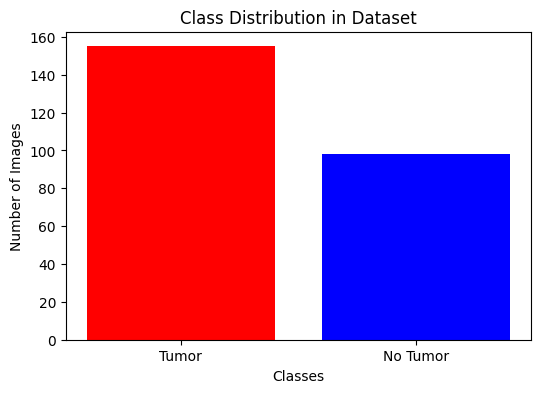

In [8]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(dataset_path):
    "Plot the class distribution of images in the dataset."
    classes = ["yes", "no"]
    num_images = [len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes]

    plt.figure(figsize=(6, 4))
    plt.bar(["Tumor", "No Tumor"], num_images, color=["red", "blue"])
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.title("Class Distribution in Dataset")
    plt.show()

# Example usage
dataset_path = "/content/dataset/brain_tumor_dataset"
plot_class_distribution(dataset_path)



📌 5. Detecting Corrupted Images

In [9]:
import os
import cv2

def detect_corrupted_images(dataset_path):
    "Identify corrupted images in the dataset."
    classes = ["yes", "no"]
    corrupted_images = []

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                corrupted_images.append(img_path)

    if corrupted_images:
        print(f"Corrupted images found: {corrupted_images}")
    else:
        print("No corrupted images detected.")

# Example usage
dataset_path = "/content/dataset/brain_tumor_dataset"
detect_corrupted_images(dataset_path)


No corrupted images detected.
